In [212]:
alpha = {
    'alpha' :   [0.1, .2 ,.3,.4]
}
ride = Ridge(alpha)
alpha_range = [0.01, 0.05, 0.1, 0.5, 1, 5, 10]
param_grid = dict(alpha=alpha_range)
# instantiate the grid
ridge = Ridge()
grid = GridSearchCV(ridge, param_grid, cv=10, scoring='neg_mean_squared_error', return_train_score=False)

verbose = 1 #updates periodically as opposed to waiting for it all to finishwhen your module wen you want 
n_jobs = -1 #how many cores do you want your (-1 all available cores)
# fit the grid with data
grid.fit(features2, target)
# # view the results as a pandas DataFrame
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]
a_scores = []
for a in alpha_range:
    ridge = Ridge(alpha=a)
    scores = cross_val_score(ridge, target, features2, cv=10, scoring='neg_mean_squared_error')
    a_scores.append((-scores.mean())**.5)
print(max())
#28360032640 features1


1624.0541182537665


In [189]:
import matplotlib.pyplot as plt
from itertools import combinations
from math import exp
from scipy.stats import norm
from statsmodels.formula.api import ols
from scipy import stats
import seaborn as sns
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings
import pickle
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 300)

df = df = pd.read_csv('kc_house_data_train.csv', index_col=0)

#clean data

def clean_data(df):
    #df['date'] = df['date'].apply(lambda x : x[0:4] + '-' + x[4:6] + '-' + x[6:8])
    pd.to_datetime(df['date'])
    #log sqft_lot
    df['sqft_lot_log'] = np.log(df['sqft_lot'])
    #get dummy vars for all categorical data
#     #floors
#     floors = pd.get_dummies(df['floors'], prefix='floors')
#     floors.iloc[:,0].drop(inplace=True)
#     df = pd.concat([df, ], 1)
    #bedrooms
    
     #view
    df = pd.concat([df, pd.get_dummies(df['view'], prefix='view', drop_first=True)], 1)
     #condition
    df = pd.concat([df, pd.get_dummies(df['condition'], prefix='condition', drop_first=True)], 1)
     #grade
    df = pd.concat([df, pd.get_dummies(df['grade'], prefix='grade', drop_first=True)], 1)
     #bedrooms
    df = pd.concat([df, pd.get_dummies(df['bedrooms'], prefix='bedrooms', drop_first=True)], 1)
     #bathrooms
    df = pd.concat([df, pd.get_dummies(df['bathrooms'], prefix='bathrooms', drop_first=True)], 1)
     #has basement
    df['has_basement'] = df['sqft_basement'].apply(lambda x : has_basement(x))
#     #fix year var
    df['bedrooms']  = df['bedrooms'].apply(lambda x : bedroom_fix(x))
    return df
def has_basement(x):
    if(x > 0):
        return 1
    else :
        return 0
            
df = clean_data(df)

def bedroom_fix(x) :
    if (x > 10):
        return 5
    else:
        return x
    
    
#standardize data
df.head(1)
df.columns
combs = list(combinations(df.columns, 2))
combs

[('id', 'date'),
 ('id', 'price'),
 ('id', 'bedrooms'),
 ('id', 'bathrooms'),
 ('id', 'sqft_living'),
 ('id', 'sqft_lot'),
 ('id', 'floors'),
 ('id', 'waterfront'),
 ('id', 'view'),
 ('id', 'condition'),
 ('id', 'grade'),
 ('id', 'sqft_above'),
 ('id', 'sqft_basement'),
 ('id', 'yr_built'),
 ('id', 'yr_renovated'),
 ('id', 'zipcode'),
 ('id', 'lat'),
 ('id', 'long'),
 ('id', 'sqft_living15'),
 ('id', 'sqft_lot15'),
 ('id', 'sqft_lot_log'),
 ('id', 'view_1'),
 ('id', 'view_2'),
 ('id', 'view_3'),
 ('id', 'view_4'),
 ('id', 'condition_2'),
 ('id', 'condition_3'),
 ('id', 'condition_4'),
 ('id', 'condition_5'),
 ('id', 'grade_3'),
 ('id', 'grade_4'),
 ('id', 'grade_5'),
 ('id', 'grade_6'),
 ('id', 'grade_7'),
 ('id', 'grade_8'),
 ('id', 'grade_9'),
 ('id', 'grade_10'),
 ('id', 'grade_11'),
 ('id', 'grade_12'),
 ('id', 'grade_13'),
 ('id', 'bedrooms_1'),
 ('id', 'bedrooms_2'),
 ('id', 'bedrooms_3'),
 ('id', 'bedrooms_4'),
 ('id', 'bedrooms_5'),
 ('id', 'bedrooms_6'),
 ('id', 'bedrooms_7'),

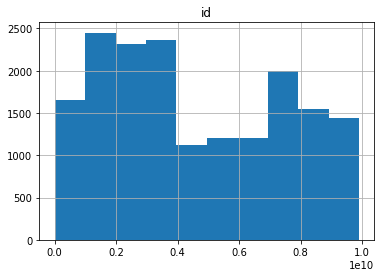

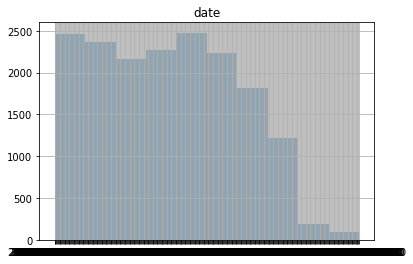

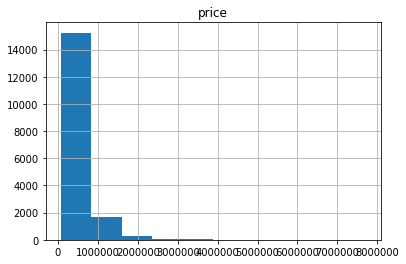

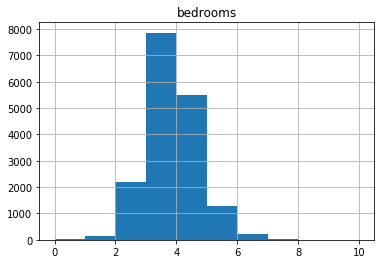

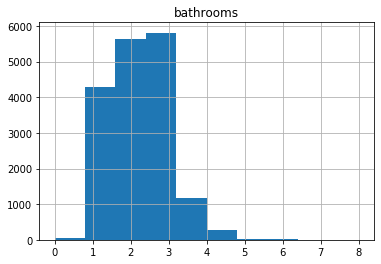

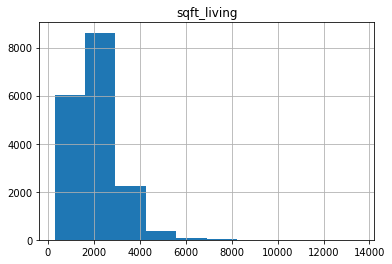

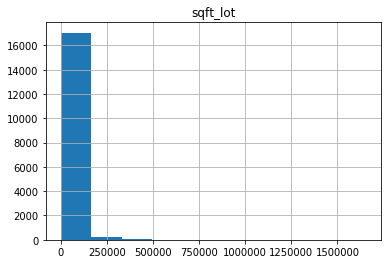

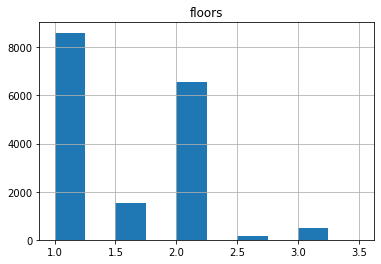

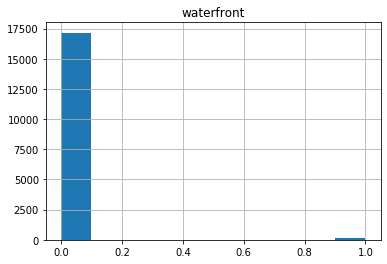

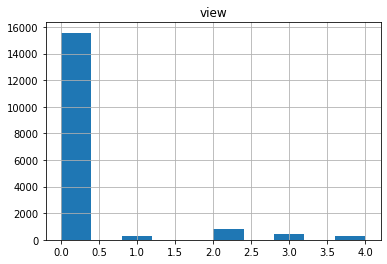

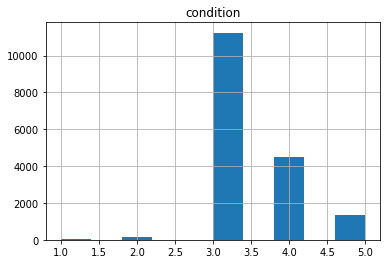

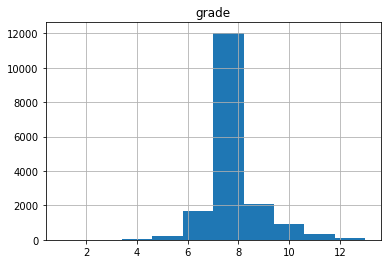

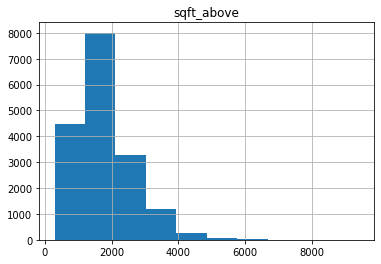

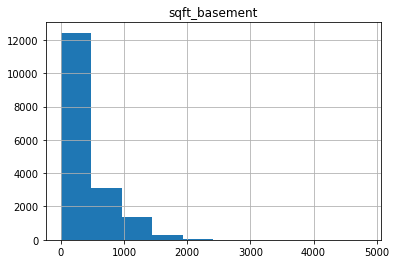

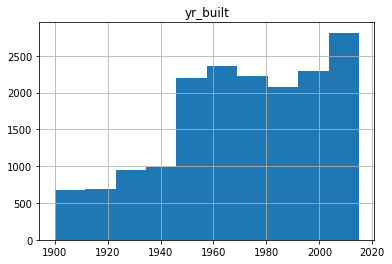

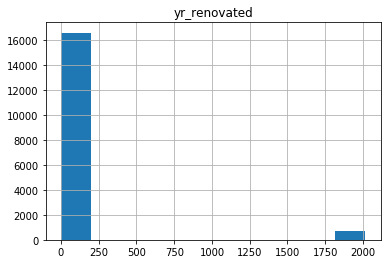

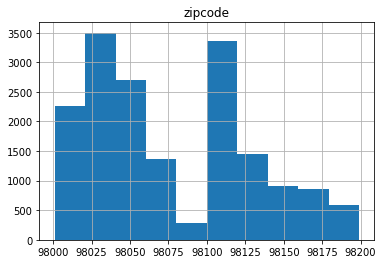

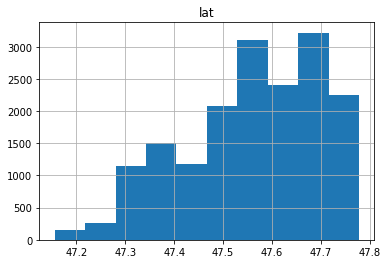

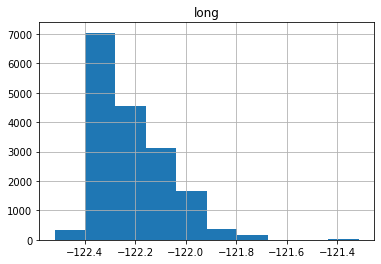

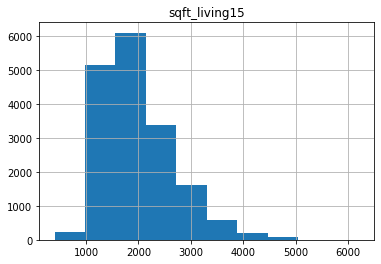

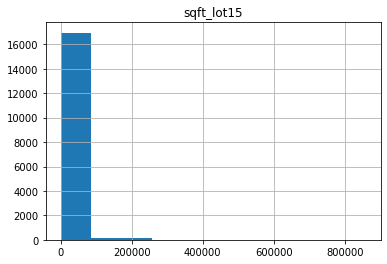

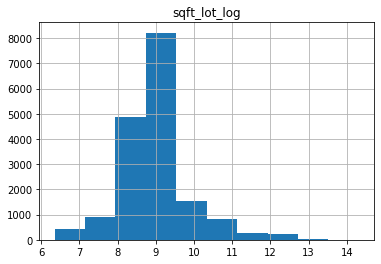

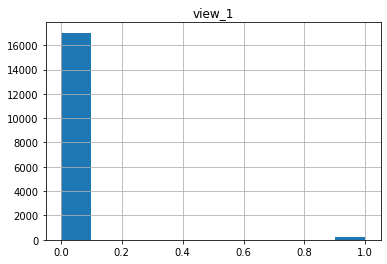

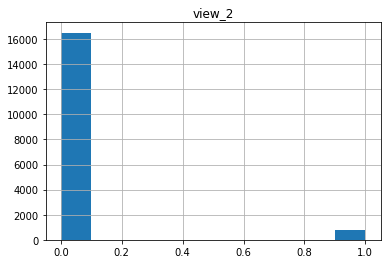

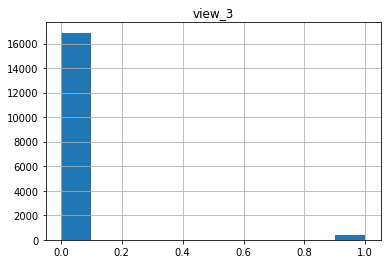

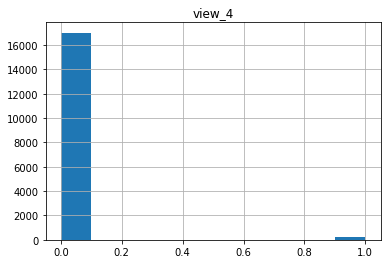

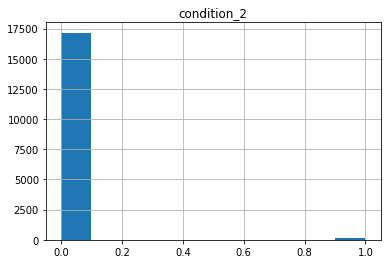

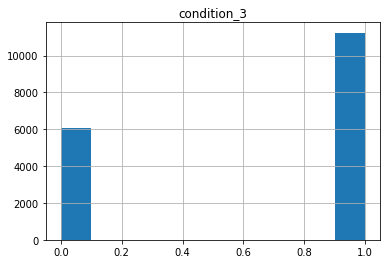

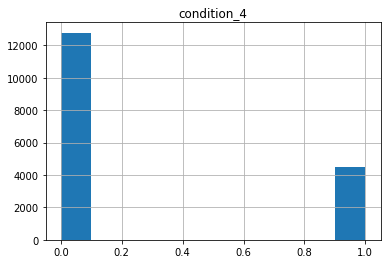

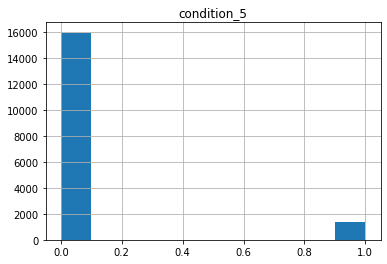

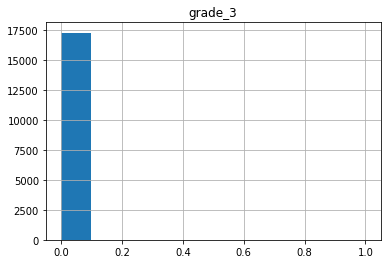

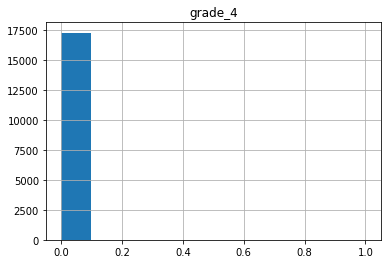

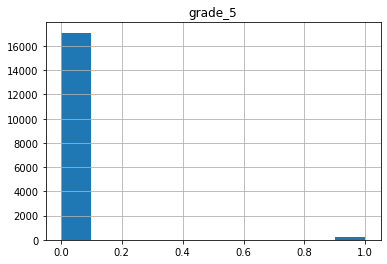

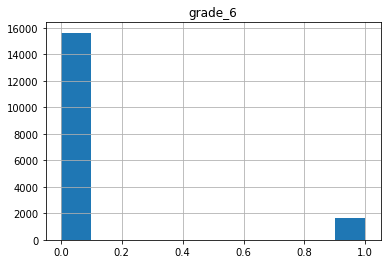

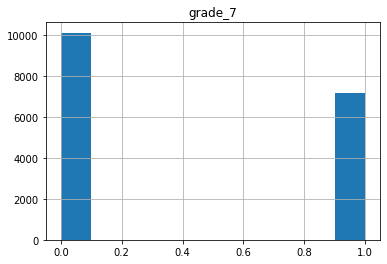

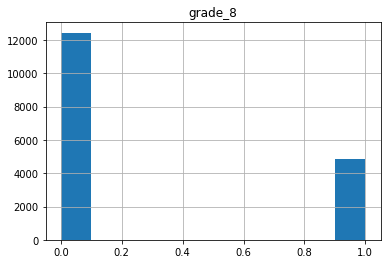

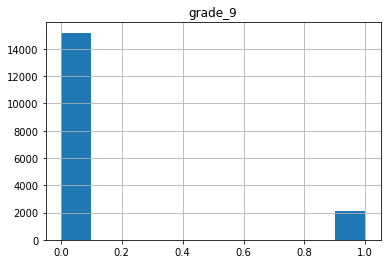

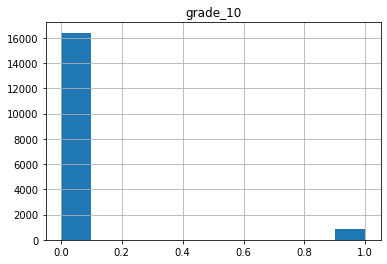

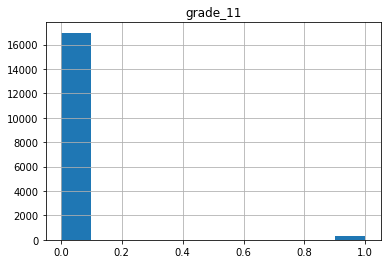

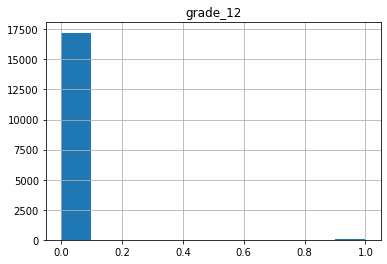

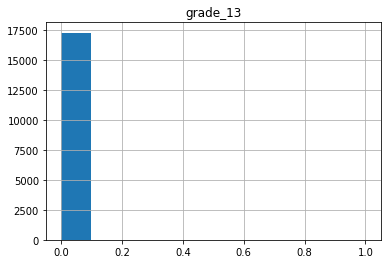

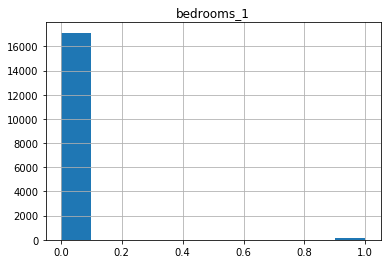

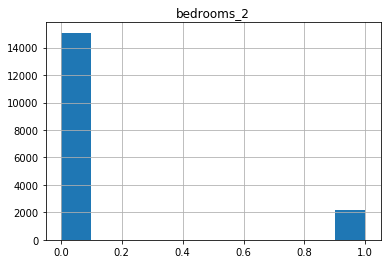

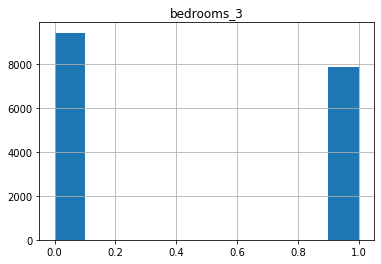

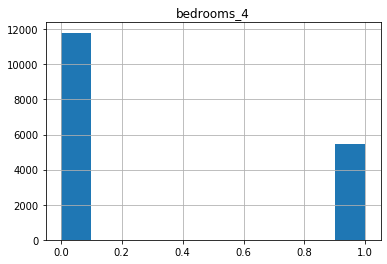

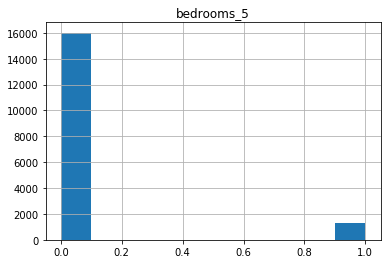

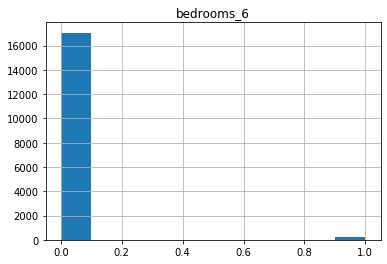

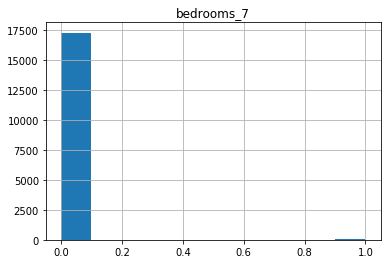

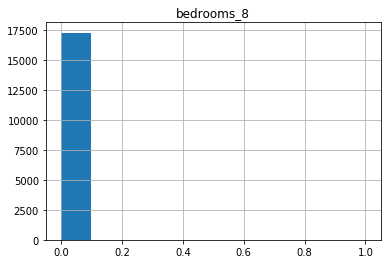

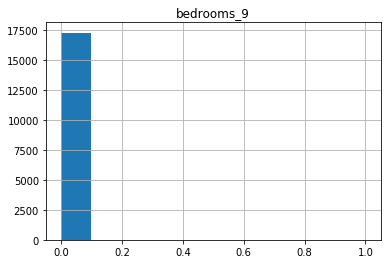

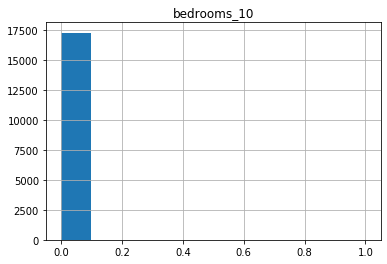

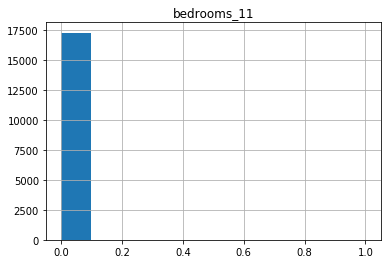

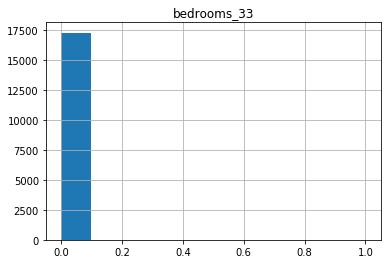

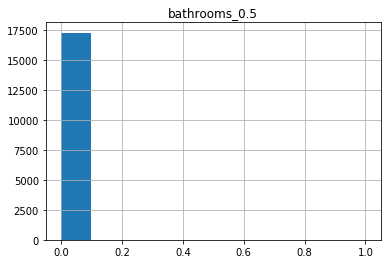

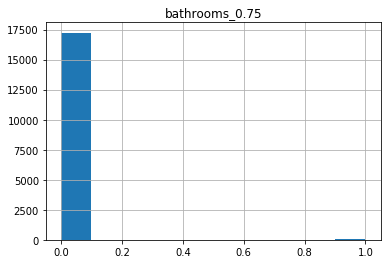

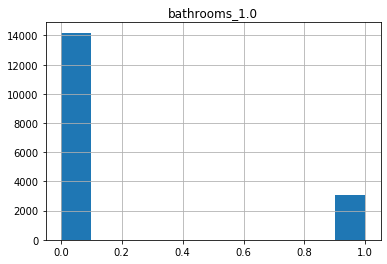

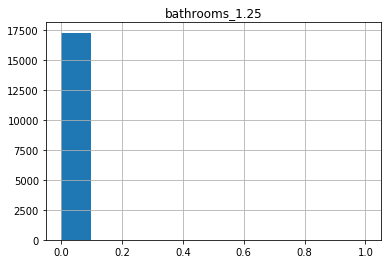

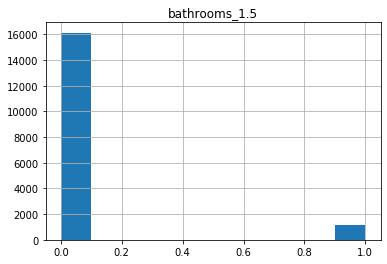

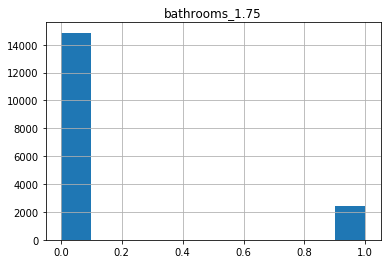

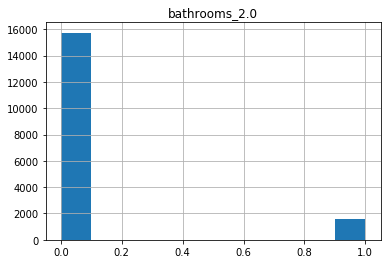

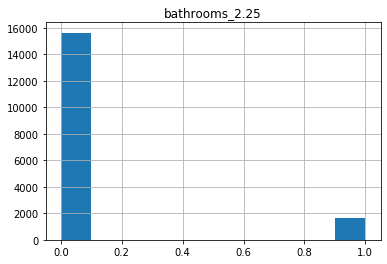

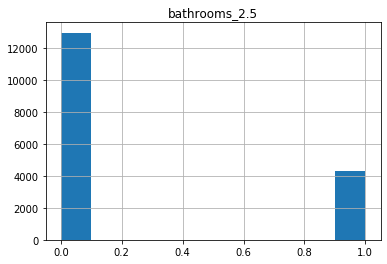

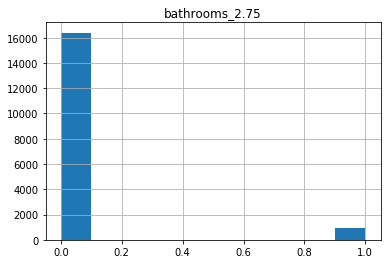

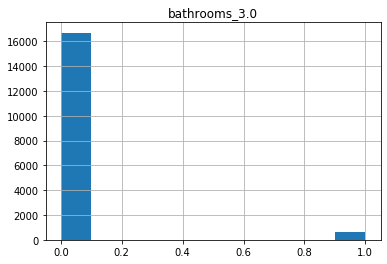

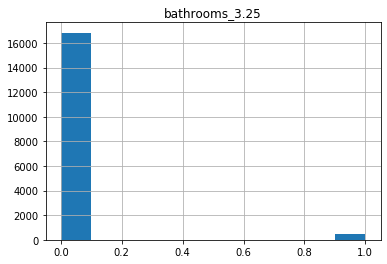

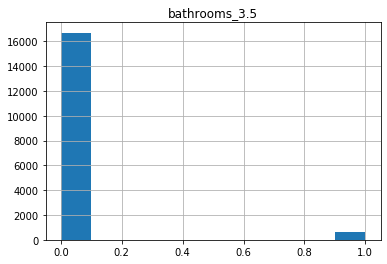

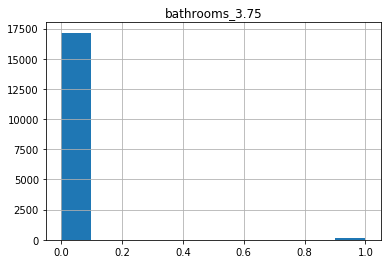

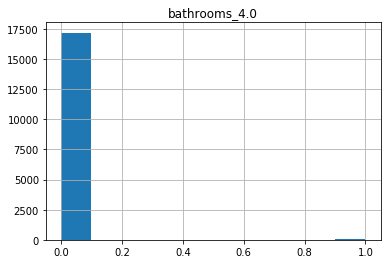

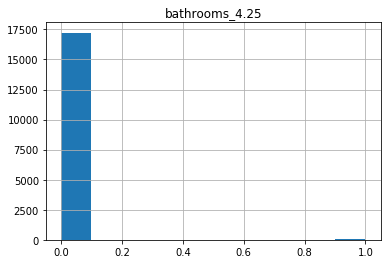

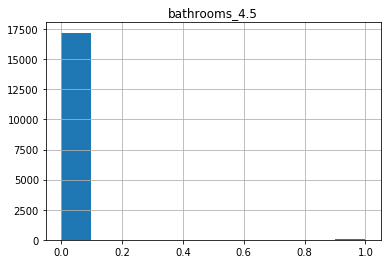

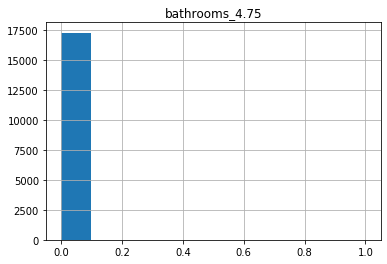

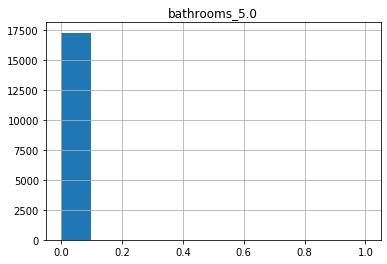

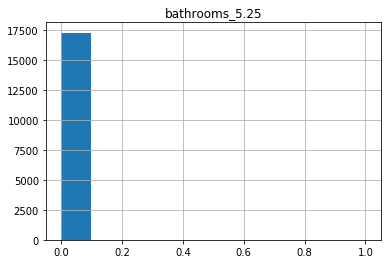

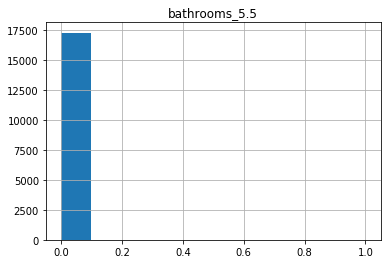

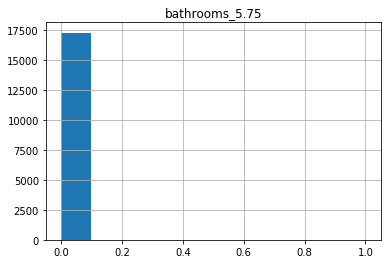

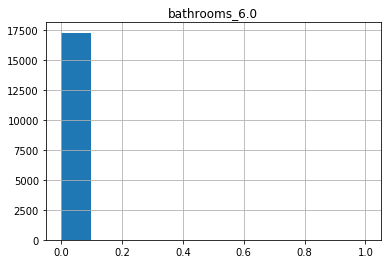

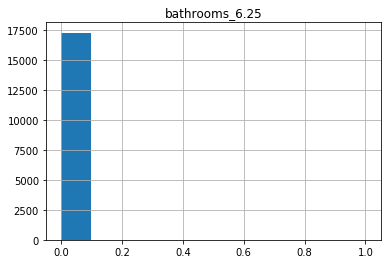

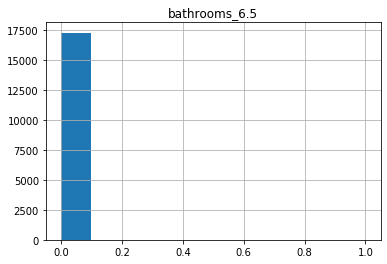

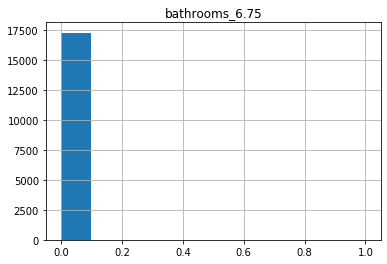

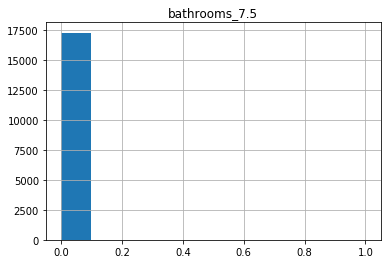

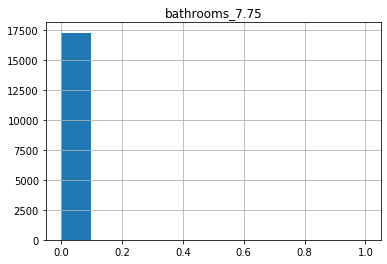

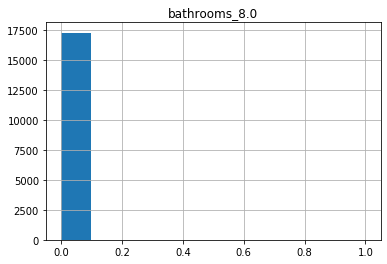

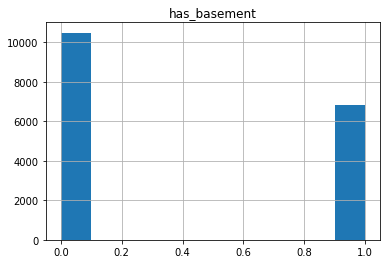

In [206]:
for var in df.columns:
    df[var].hist()
    plt.title(var)
    plt.show()

In [184]:
df.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_lot_log,view_1,view_2,view_3,view_4,condition_2,condition_3,condition_4,condition_5,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_9,bedrooms_10,bathrooms_0.75,bathrooms_1.0,bathrooms_1.25,bathrooms_1.5,bathrooms_1.75,bathrooms_2.0,bathrooms_2.25,bathrooms_2.5,bathrooms_2.75,bathrooms_3.0,bathrooms_3.25,bathrooms_3.5,bathrooms_3.75,bathrooms_4.0,bathrooms_4.25,bathrooms_4.5,bathrooms_4.75,bathrooms_5.0,bathrooms_5.25,bathrooms_5.5,bathrooms_6.0,bathrooms_6.25,bathrooms_6.5,has_basement
0,1974300020,20140827T000000,4,2.50,2270,11500,1.0,0,0,3,8,1540,730,1967,0,98034,47.7089,-122.241,2020,10918,9.350102,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1974300020,20150218T000000,4,2.50,2270,11500,1.0,0,0,3,8,1540,730,1967,0,98034,47.7089,-122.241,2020,10918,9.350102,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,3630020380,20141107T000000,3,2.50,1470,1779,2.0,0,0,3,8,1160,310,2005,0,98029,47.5472,-121.998,1470,1576,7.483807,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1771000290,20141203T000000,3,1.75,1280,16200,1.0,0,0,3,8,1030,250,1976,0,98077,47.7427,-122.071,1160,10565,9.692767,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,5126310470,20150115T000000,4,2.75,2830,8126,2.0,0,0,3,8,2830,0,2005,0,98059,47.4863,-122.140,2830,7916,9.002824,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [190]:
# bedroomssqft_living
# sqft_livingwaterfront
# sqft_livinggrade
# sqft_livingcondition
# sqft_livingzipcode
from sklearn.linear_model import Lasso, Ridge, LinearRegression
target = df[['price']]
features = df[['bedrooms','bathrooms',
               'sqft_living', 'view','waterfront',
               'floors','condition', 'grade',
              'yr_built']]
features1 = df[['sqft_living', 'bedrooms', 'grade', 'condition', 'yr_built', 'zipcode', 'sqft_lot_log']]
features2 = df[['sqft_living', 'grade', 'condition', 'waterfront', 'zipcode', 'bedrooms', 'lat', 'long']]
features_basement = df[['sqft_living', 'grade', 'condition', 'waterfront', 
                        'lat', 'long', 'zipcode', 'has_basement', 'sqft_lot_log', 'bedrooms']]
X_train , X_test, y_train, y_test = train_test_split(features_basement, target, test_size=0.2, random_state=12)

ridge_01 = Ridge(alpha=0.5)
ridge_01.fit(X_train, y_train)

lasso_01 = Lasso(alpha=0.5)
lasso_01.fit(X_train, y_train)

lin = LinearRegression()
lin.fit(X_train, y_train)

ridge = Ridge(alpha=0.5)
ridge.fit(features_basement, df[['price']])

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [193]:
df['price'].mean()

540739.5486408329

In [187]:
final_ys = lin.predict(features_basement)

ValueError: shapes (17290,10) and (8,1) not aligned: 10 (dim 1) != 8 (dim 0)

In [87]:
len(lasso_01.predict(X_test))

3458

In [88]:
lasso_01.coef_.sum()

0.0016920718780516315

In [123]:
ridge_01.predict()

array([[ 1.69724213e-03],
       [ 2.04238295e-06],
       [ 5.67289463e-08],
       [ 6.72942021e-08],
       [-7.33664612e-06]])

In [177]:
ridge_predicts = lin.predict(X_train)
ridge_true = lin.predict(X_test)
rmse_pred = np.sqrt(metrics.mean_squared_error(y_train, ridge_predicts))
rmse_true = np.sqrt(metrics.mean_squared_error(ridge_true, y_test))
print('ridge rmse pred: ', rmse_pred)
print('ridge rmse true: ', rmse_true)
#all features
# ridge rmse pred:  238563.81681146933
# ridge rmse true:  225495.84279819106
#features 1
# ridge rmse pred:  234580.54072758352
# ridge rmse true:  215105.01844158597
#features 2
# ridge rmse pred:  240769.16297657514
# ridge rmse true:  226812.47757565085
# #features has basement
# ridge rmse pred:  221640.32024583753
# ridge rmse true:  207114.02189902382

ridge rmse pred:  219635.93976826768
ridge rmse true:  205611.55052670656


In [75]:
# create predictions
y_h_ridge_train_01 = ridge_01.predict(X_train)
y_h_ridge_test_01 = ridge_01.predict(X_test)

#y_h_lasso_train_01 = np.reshape(lasso_01.predict(X_train),(13832,1))
#y_h_lasso_test_01 = np.reshape(lasso_01.predict(X_test),(3458,1))

y_h_lin_train = lin.predict(X_train)
y_h_lin_test = lin.predict(X_test)

In [77]:
# examine the residual sum of sq
print('Train Error Ridge Model', np.sum((y_train - y_h_ridge_train_01)**2))
print('Test Error Ridge Model', np.sum((y_test - y_h_ridge_test_01)**2))
print('\n')

#print('Train Error Lasso Model', np.sum((y_train - y_h_lasso_train_01)**2))
#print('Test Error Lasso Model', np.sum((y_test - y_h_lasso_test_01)**2))
print('\n')

print('Train Error Unpenalized Linear Model', np.sum((y_train - lin.predict(X_train))**2))
print('Test Error Unpenalized Linear Model', np.sum((y_test - lin.predict(X_test))**2))

print('Train Error Ridge MSE', (np.sum(y_train - y_h_ridge_train_01)**2) / len(y_train))
print('Test Error Ridge MSE', (np.sum(y_test - y_h_ridge_test_01)**2) / len(y_train))
print('\n')
print('Train Error Unpenalized Linear Model MSE', (np.sum(y_train - lin.predict(X_train))**2) / len(y_train))
print('Test Error Unpenalized Linear Model MSE', (np.sum(y_test - lin.predict(X_test))**2) / len(y_train))
print('\n')

Train Error Ridge Model sqft_living    5.855973e+09
grade          1.059184e+04
condition      5.871573e+03
waterfront     9.528466e+01
zipcode        3.939813e+07
dtype: float64
Test Error Ridge Model sqft_living    1.538151e+09
grade          2.684482e+03
condition      1.452807e+03
waterfront     3.121024e+01
zipcode        1.016878e+07
dtype: float64




Train Error Unpenalized Linear Model sqft_living    5.855973e+09
grade          1.059184e+04
condition      5.871573e+03
waterfront     9.528466e+01
zipcode        3.939813e+07
dtype: float64
Test Error Unpenalized Linear Model sqft_living    1.538151e+09
grade          2.684482e+03
condition      1.452807e+03
waterfront     3.121024e+01
zipcode        1.016878e+07
dtype: float64
Train Error Ridge MSE sqft_living    1.134746e-22
grade          1.376044e-27
condition      1.275692e-27
waterfront     9.601303e-31
zipcode        4.166746e-19
dtype: float64
Test Error Ridge MSE sqft_living    343135.917151
grade               0.478686


In [200]:
features_list = ['bedrooms', 'bathrooms', 'sqft_living', 
                 'sqft_lot', 'floors', 'waterfront', 'grade', 'condition', 'zipcode']
df_others = df.drop(columns='price')
combs = list(combinations(features_list, 2))
comb_rsquared_dict = {}
for c in range(0, len(combs)):
    if (combs[c][0] == 'price' or combs[c][1] == 'price'):
        continue
    form_str = "price~" + combs[c][0] + "*"  + combs[c][1]
    lin = ols(formula=form_str, data=df).fit()
    comb_rsquared_dict[combs[c][0] + '' + combs[c][1]] = lin.rsquared
comb_rsquared_dict  

{'bedroomsbathrooms': 0.2998914431499018,
 'bedroomssqft_living': 0.5237946077618747,
 'bedroomssqft_lot': 0.10529975363613153,
 'bedroomsfloors': 0.15595391930292402,
 'bedroomswaterfront': 0.18870041691859119,
 'bedroomsgrade': 0.4937047167125972,
 'bedroomscondition': 0.09985204662127822,
 'bedroomszipcode': 0.10247571336441719,
 'bathroomssqft_living': 0.5357736518469598,
 'bathroomssqft_lot': 0.27771226518074243,
 'bathroomsfloors': 0.28863194611893495,
 'bathroomswaterfront': 0.35211143499093667,
 'bathroomsgrade': 0.5476327449344006,
 'bathroomscondition': 0.287748613406938,
 'bathroomszipcode': 0.28583859902781394,
 'sqft_livingsqft_lot': 0.49621005285801323,
 'sqft_livingfloors': 0.5025252643297821,
 'sqft_livingwaterfront': 0.5530393184480623,
 'sqft_livinggrade': 0.6026231663581595,
 'sqft_livingcondition': 0.5059378756977373,
 'sqft_livingzipcode': 0.5050218389716403,
 'sqft_lotfloors': 0.0764419216308142,
 'sqft_lotwaterfront': 0.08287781453111565,
 'sqft_lotgrade': 0.4440

In [211]:
features_list = ['bedrooms', 'bathrooms', 'sqft_living', 
                 'sqft_lot', 'floors', 'waterfront', 'grade', 'condition', 'zipcode', 'lat', 'long']
df_others = df.drop(columns='price')
#combs = list(combinations(features_list, 2))
comb_rsquared_dict = {}
for c in features_list:
    print(c)
    #if (combs[c][0] == 'price' or combs[c][1] == 'price'):
        #continue
    form_str = "price~" + c # + "*"  + combs[c][1]
    lin = ols(formula=form_str, data=df).fit()
    comb_rsquared_dict[c] = lin.rsquared
comb_rsquared_dict  

bedrooms
bathrooms
sqft_living
sqft_lot
floors
waterfront
grade
condition
zipcode
lat
long


{'bedrooms': 0.09885362661091257,
 'bathrooms': 0.2749267785231909,
 'sqft_living': 0.49496895932281704,
 'sqft_lot': 0.0075347797932542315,
 'floors': 0.06604132715445588,
 'waterfront': 0.07605387527078611,
 'grade': 0.4438423664493838,
 'condition': 0.0013031263395621995,
 'zipcode': 0.00239693329597368,
 'lat': 0.0914419943750372,
 'long': 0.0003735468143394316}

In [201]:
#
# bedroomssqft_living
# sqft_livingwaterfront
# sqft_livinggrade
# sqft_livingcondition
# sqft_livingzipcode

#with log
# datesqft_living
# bedroomssqft_living
# sqft_livingwaterfront
# sqft_livingview
# sqft_livingcondition
# sqft_livinggrade
# sqft_livingyr_built
# sqft_livingyr_renovated
# sqft_livingzipcode
# sqft_livinglat
# sqft_livinglong
# sqft_livingsqft_living15
# sqft_livingsqft_lot_log
# gradeyr_built


#sqft_living, bedrooms, grade, condition, yr_built, zipcode
comb_rsquared_dict
for key in comb_rsquared_dict:
    if (comb_rsquared_dict[key] > 0.5):
        print(key)

bedroomssqft_living
bathroomssqft_living
bathroomsgrade
sqft_livingfloors
sqft_livingwaterfront
sqft_livinggrade
sqft_livingcondition
sqft_livingzipcode
waterfrontgrade


In [197]:
for c in comb_rsquared_dict:
    print(c)

bedroomsbathrooms
bedroomssqft_living
bedroomssqft_lot
bedroomsfloors
bedroomswaterfront
bedroomsgrade
bedroomscondition
bedroomszipcode
bathroomssqft_living
bathroomssqft_lot
bathroomsfloors
bathroomswaterfront
bathroomsgrade
bathroomscondition
bathroomszipcode
sqft_livingsqft_lot
sqft_livingfloors
sqft_livingwaterfront
sqft_livinggrade
sqft_livingcondition
sqft_livingzipcode
sqft_lotfloors
sqft_lotwaterfront
sqft_lotgrade
sqft_lotcondition
sqft_lotzipcode
floorswaterfront
floorsgrade
floorscondition
floorszipcode
waterfrontgrade
waterfrontcondition
waterfrontzipcode
gradecondition
gradezipcode
conditionzipcode


In [52]:
df.replace(to_replace=(df['sqft_basement'] > 0), value=1)


<class 'str'>


0       2014-10-06
1       2014-08-21
2       2014-08-15
3       2015-03-31
4       2014-07-14
           ...    
17285   2015-03-03
17286   2014-05-20
17287   2014-05-14
17288   2014-12-04
17289   2015-01-16
Name: date, Length: 17290, dtype: datetime64[ns]

In [24]:
floors = pd.get_dummies(df['floors'], prefix='floors')
floors.iloc[:,0]

0        0
1        1
2        0
3        0
4        0
        ..
17285    1
17286    0
17287    1
17288    0
17289    1
Name: floors_1.0, Length: 17290, dtype: uint8

In [41]:
Y = df[['price']]
X = df.drop(['price'], axis=1)

(17290, 20)

(17290, 1)
(17290,)


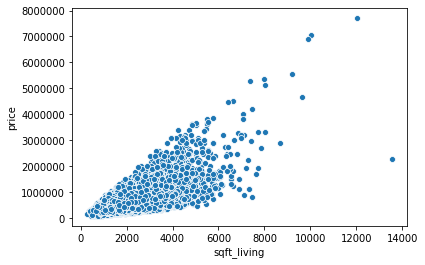

In [48]:
print(Y.shape)
print(X['sqft_living'].shape)
sns.scatterplot(df['sqft_living'], df['price'])
plt.show()

In [27]:
floors = pd.get_dummies(df['floors'], prefix='floors')
#floors.drop(columns=floors.iloc[:,0], inplace=True)
floors

,floors_1.0,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5
0,0,0,1,0,0,0
1,1,0,0,0,0,0
2,0,0,1,0,0,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0
...,...,...,...,...,...,...
17285,1,0,0,0,0,0
17286,0,0,1,0,0,0
17287,1,0,0,0,0,0
17288,0,1,0,0,0,0


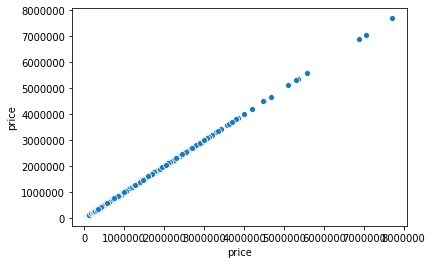

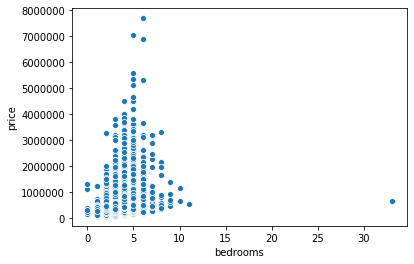

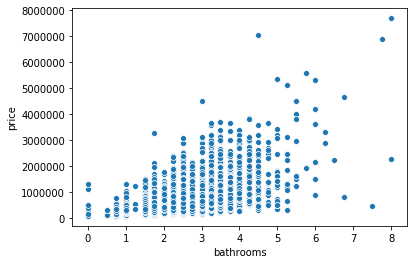

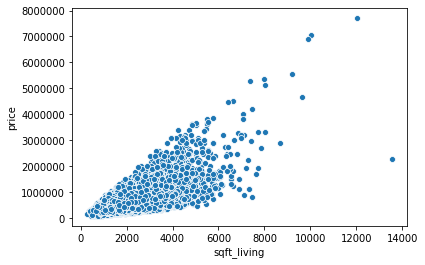

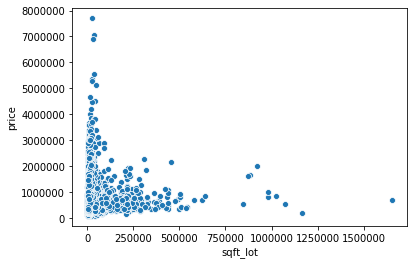

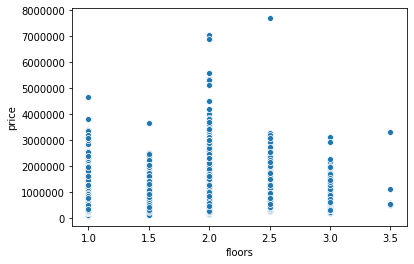

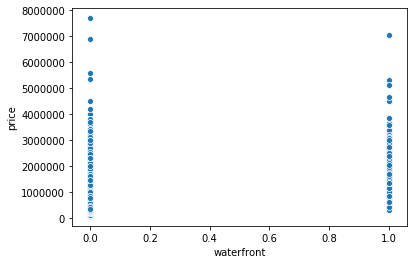

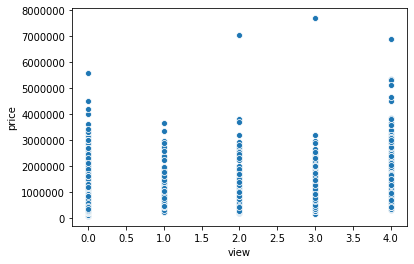

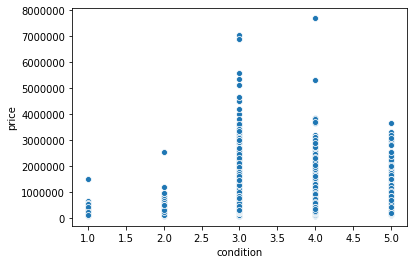

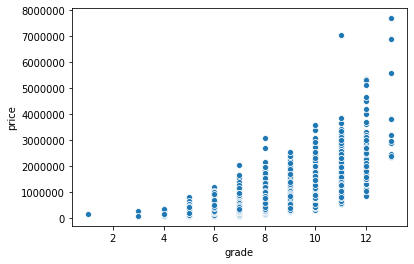

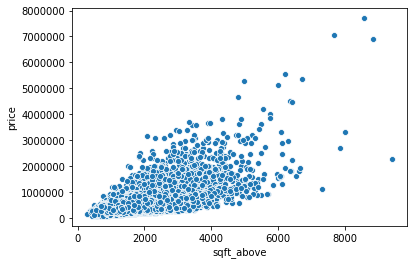

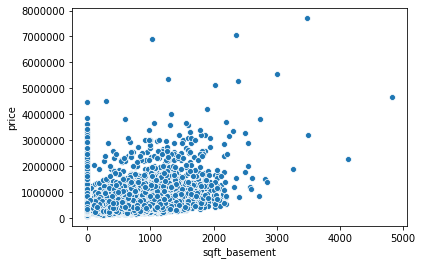

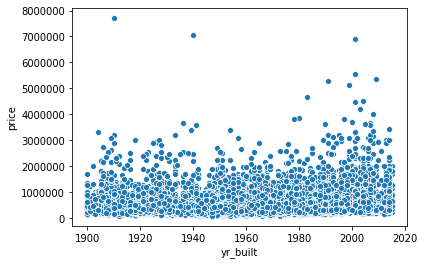

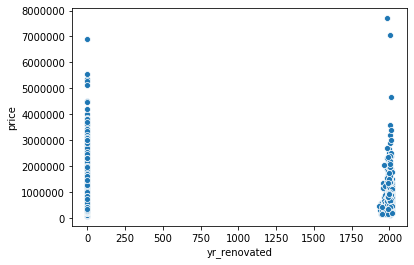

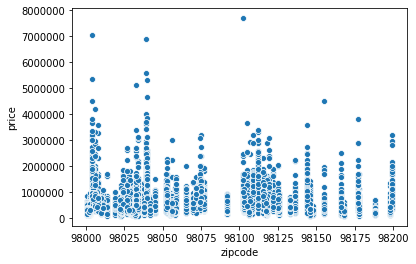

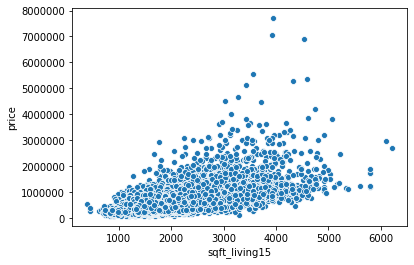

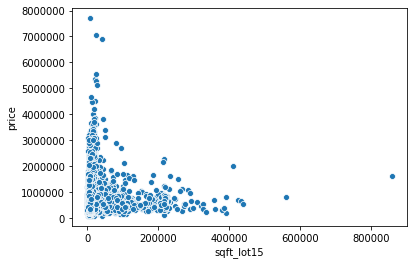

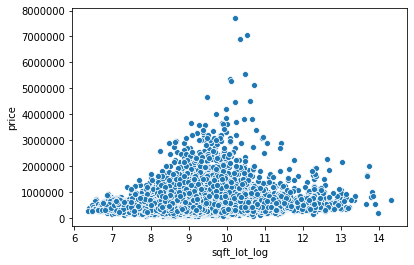

In [84]:
for key in df.keys():
    if (key == 'id' or key == 'date' or key == 'lat' or key == 'long'):
        continue
    else:
        sns.scatterplot(df[key], df['price'])
        plt.show()
    


In [191]:
with open('data.pickle', 'wb') as f_reg:
    pickle.dump(lin, f_reg, pickle.HIGHEST_PROTOCOL)